<a href="https://colab.research.google.com/github/misrapk/Deep-Learning-Course-YT/blob/main/Batch_Normalisation_and_Early_Stopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from tensorflow.keras import Sequential, layers

In [24]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_valid, X_test = X_train / 255, X_valid / 255, X_test / 255

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [25]:
print("Shape of X_train, ", X_train_full.shape)
print("Shape of y_train, ", y_train_full.shape)
print("Shape of X_test, ", X_test.shape)
print("Shape of y_test, ", y_test.shape)

print('Data Type: ', X_train_full.dtype)


Shape of X_train,  (60000, 28, 28)
Shape of y_train,  (60000,)
Shape of X_test,  (10000, 28, 28)
Shape of y_test,  (10000,)
Data Type:  uint8


In [26]:
tf.random.set_seed(42)



In [27]:
model = tf.keras.Sequential([
    #flatten
    tf.keras.layers.Flatten(input_shape=[28,28]),
    #bN
    tf.keras.layers.BatchNormalization(),
    #dense
    tf.keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

In [29]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('gamma', True),
 ('beta', True),
 ('moving_mean', False),
 ('moving_variance', False)]

In [30]:
model.compile(optimizer='sgd',
              loss ='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
modelTrain = model.fit(X_train, y_train, epochs =40, validation_data= (X_valid, y_valid))


Epoch 1/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7489 - loss: 0.7335 - val_accuracy: 0.8504 - val_loss: 0.4050
Epoch 2/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8556 - loss: 0.4116 - val_accuracy: 0.8594 - val_loss: 0.3720
Epoch 3/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8743 - loss: 0.3554 - val_accuracy: 0.8680 - val_loss: 0.3587
Epoch 4/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8882 - loss: 0.3179 - val_accuracy: 0.8724 - val_loss: 0.3526
Epoch 5/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9003 - loss: 0.2874 - val_accuracy: 0.8742 - val_loss: 0.3494
Epoch 6/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9102 - loss: 0.2609 - val_accuracy: 0.8760 - val_loss: 0.3487
Epoch 7/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9188 - loss: 0.2363 - val_accuracy: 0.8754 - val_loss: 0.3520
Epoch 8/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9272 - loss: 0.2139 - 

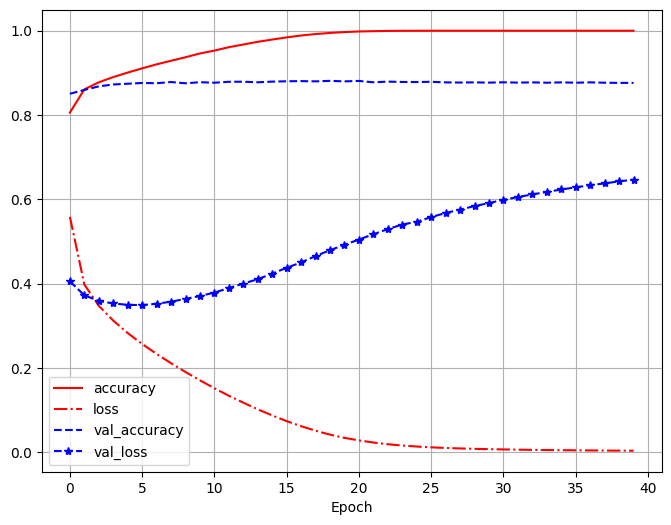

In [33]:
# plot the accuracy and loss
import matplotlib.pyplot as plt
import pandas as pd


pd.DataFrame(modelTrain.history).plot(figsize=(8,6),grid = True, xlabel="Epoch",
                                      style = ['r-', 'r-.', 'b--', 'b--*'])
plt.show()

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

model2 = tf.keras.Sequential([
    #flatten
    tf.keras.layers.Flatten(input_shape=[28,28]),
    #bN
    tf.keras.layers.BatchNormalization(),
    #dense
    tf.keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
model2.compile(optimizer='sgd',
              loss ='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss',
    patience=3,
    mode='auto',
    baseline=None,
    restore_best_weights=True,
    verbose=1)

In [36]:
modelTrain_earlyStop = model2.fit(X_train, y_train, epochs =40, validation_data= (X_valid, y_valid), callbacks=[early_stopping])


Epoch 1/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7630 - loss: 0.7089 - val_accuracy: 0.8582 - val_loss: 0.3867
Epoch 2/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8554 - loss: 0.4068 - val_accuracy: 0.8708 - val_loss: 0.3546
Epoch 3/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8754 - loss: 0.3531 - val_accuracy: 0.8756 - val_loss: 0.3422
Epoch 4/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8883 - loss: 0.3173 - val_accuracy: 0.8788 - val_loss: 0.3359
Epoch 5/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8984 - loss: 0.2885 - val_accuracy: 0.8802 - val_loss: 0.3330
Epoch 6/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9092 - loss: 0.2628 - val_accuracy: 0.8826 - val_loss: 0.3324
Epoch 7/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9184 - loss: 0.2395 - val_accuracy: 0.8822 - val_loss: 0.3347
Epoch 8/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9275 - loss: 0.2178 - 

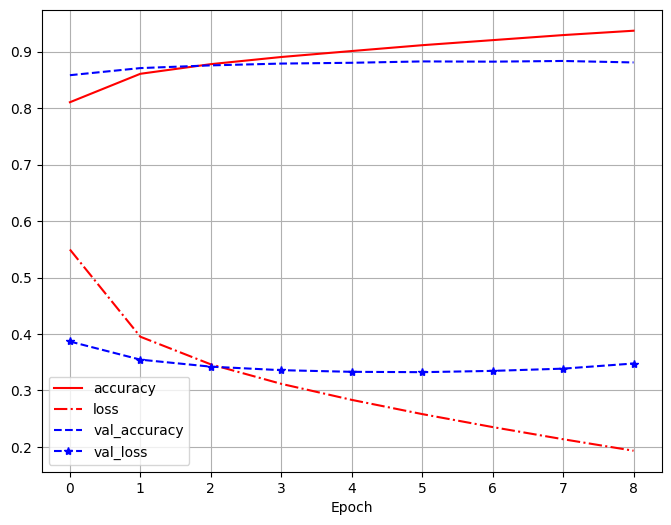

In [37]:
# plot the accuracy and loss
import matplotlib.pyplot as plt
import pandas as pd


pd.DataFrame(modelTrain_earlyStop.history).plot(figsize=(8,6),grid = True, xlabel="Epoch",
                                      style = ['r-', 'r-.', 'b--', 'b--*'])
plt.show()